In [56]:
import pandas as pd

In [57]:
url_dataset = pd.read_csv("url_dataset.csv")

In [58]:
url_dataset.head(10)

,protocol,domain_name,address,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,abnormal_url,web_traffic,domain_registration_length,age_of_domain,dns_record,statistical_report
0,http,www.liquidgeneration.com,NaN,0,0,0,0,0,0,0,1,1,2,1,1,1,0
1,http,www.onlineanime.org,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2,http,www.ceres.dti.ne.jp,~nekoi/senno/senfirst.html,0,0,0,0,1,0,0,1,1,0,1,1,1,0
3,http,www.galeon.com,kmh/,0,0,0,0,0,0,0,1,1,0,1,1,1,0
4,http,www.fanworkrecs.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,0
5,http,www.animehouse.com,NaN,0,0,0,0,0,0,0,1,1,1,1,1,1,1
6,http,www2.117.ne.jp,~mb1996ax/enadc.html,0,0,0,0,2,0,0,1,1,2,1,1,1,0
7,http,archive.rhps.org,fritters/yui/index.html,0,0,0,0,0,0,0,1,1,2,1,1,1,0
8,http,www.freecartoonsex.com,NaN,0,0,0,0,0,0,1,1,1,2,1,1,1,0
9,http,www.cutepet.org,NaN,0,0,0,0,0,0,0,1,1,2,1,1,1,0


In [59]:
urls = url_dataset.drop(url_dataset.columns[[0,1,2]],axis=1)

In [60]:
urls.head()

,long_url,having_@_symbol,redirection_//_symbol,prefix_suffix_seperation,sub_domains,having_ip_address,shortening_service,https_token,abnormal_url,web_traffic,domain_registration_length,age_of_domain,dns_record,statistical_report
0,0,0,0,0,0,0,0,1,1,2,1,1,1,0
1,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2,0,0,0,0,1,0,0,1,1,0,1,1,1,0
3,0,0,0,0,0,0,0,1,1,0,1,1,1,0
4,0,0,0,0,0,0,0,1,1,1,1,1,1,0


In [61]:
urls = urls.sample(frac=1).reset_index(drop=True)

In [62]:
urls_without_labels = urls.drop('statistical_report',axis=1)
urls_without_labels.columns
prediction_labels = 0.16
labels = urls['statistical_report']

In [63]:
from sklearn.model_selection import train_test_split
data_train, data_test, labels_train, labels_test = train_test_split(urls_without_labels, labels, test_size=0.30, random_state=110)

In [64]:
print(len(data_train),len(data_test),len(labels_train),len(labels_test))

1309 562 1309 562


In [65]:
labels_train.value_counts()

0    942
1    367
Name: statistical_report, dtype: int64

In [66]:
labels_test.value_counts()

0    399
1    163
Name: statistical_report, dtype: int64

In [67]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import svm
support = svm.LinearSVC(random_state=20)

In [68]:
support.fit(data_train,labels_train)

LinearSVC(random_state=20)

In [69]:
y_pred = support.predict(data_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
model1=metrics.accuracy_score(labels_test,y_pred)
model1

0.7775800711743772

In [71]:
cnf_matrix = confusion_matrix(labels_test,y_pred)

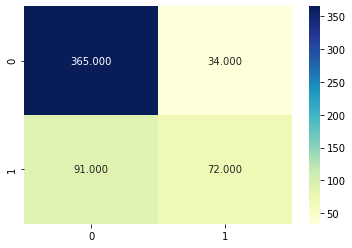

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
labels = ['0','1']
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.show()